In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# importing dataset
dataset = pd.read_csv("01-Naive Bayes.csv")
dataset.head(3)

,User ID,Gender,Age,Estimated Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Female,35,20000,0
2,15804002,Female,26,43000,0


In [3]:
x = dataset.iloc[:, [2, 3]].values  
y = dataset.iloc[:, 4].values 

In [4]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [6]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
gnb = GaussianNB()  
gnb.fit(x_train, y_train) 

GaussianNB()

In [7]:
# Predicting the Test set results  
y_pred = gnb.predict(x_test)

Confusion Matrix:
 [[14  5]
 [ 7  3]]


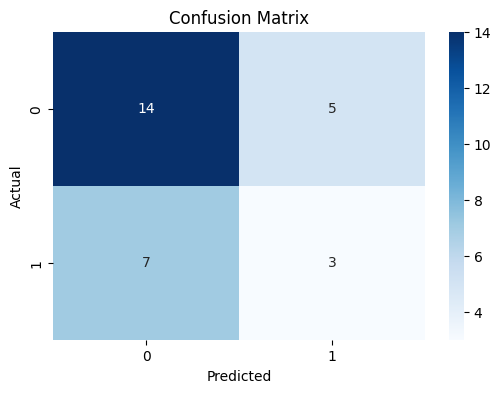

In [8]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
from matplotlib.colors import ListedColormap

C:\Users\Ali\AppData\Local\Temp\ipykernel_19088\2366272992.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


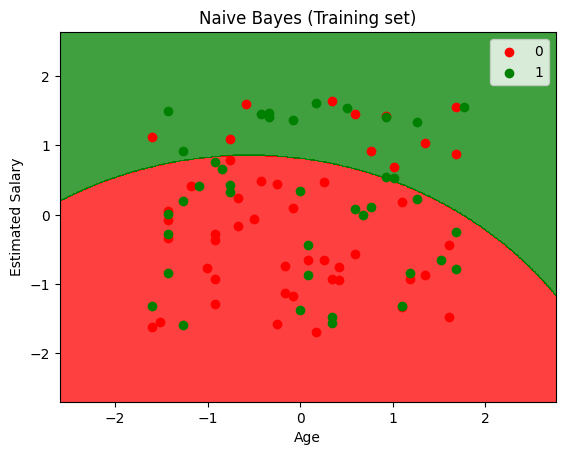

C:\Users\Ali\AppData\Local\Temp\ipykernel_19088\2366272992.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


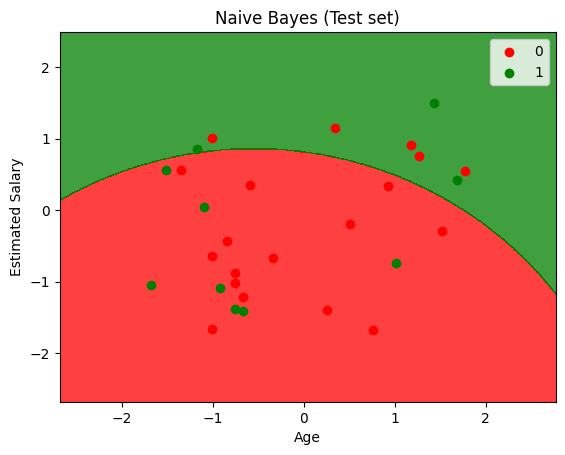

In [10]:
# Function to visualize the results
def visualize_results(x_set, y_set, title):
    x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(x1, x2, gnb.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Visualizing the training set results
visualize_results(x_train, y_train, 'Naive Bayes (Training set)')

# Visualizing the test set results
visualize_results(x_test, y_test, 'Naive Bayes (Test set)')